# MDI220
# Statistics

# Project 

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Tarcisio DA SILVA BUENO

## Imports

Please do **not** import any other library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm, chi2, gaussian_kde

In [4]:
import seaborn as sns

## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**. 

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [5]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [6]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [7]:
regions = list(df.region.unique())

In [8]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [9]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [10]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [11]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

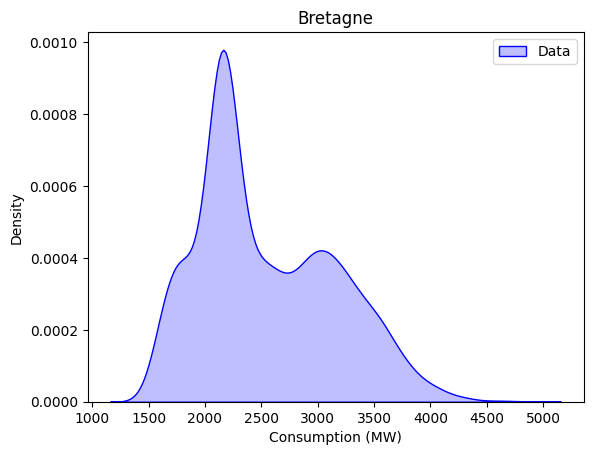

In [12]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution. 

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne. 

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

Mean:

$\hat \mu = \frac 1 n \sum_{i=1}^n x_i $. The expected value of $\hat \mu$ is:

$$
E[\hat \mu]= E\left[\frac 1 n \sum_{i=1}^n x_i \right] = \frac 1 n \sum_{i=1}^n  E\left[x_i\right] = \frac 1 n \sum_{i=1}^n  \mu = \frac 1 n n  \mu = \mu
$$

Hence, as $E[\hat \mu] = \mu$, $\hat \mu$ is an unbiased estimator for the mean.

Variance:

The estimator for the variance is:

$$ \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n \left(x_i - \hat \mu \right)^2 =  \frac 1 {n-1} \left( \sum_{i=1}^n x_i^2 - 2\hat \mu \sum_{i=1}^n x_i + \sum_{i=1}^n \hat \mu ^2 \right) =  \frac 1 {n-1} \left( \sum_{i=1}^n x_i^2 - 2n\hat \mu ^2 + n \hat \mu ^2 \right) = \frac 1 {n-1} \left( \sum_{i=1}^n x_i^2 - n \hat \mu ^2 \right) $$

Now we take the $E[\hat{\sigma^2}]$:

$$ E \left[\hat{\sigma^2} \right] = \frac 1 {n-1} \left( \sum_{i=1}^n E[x_i^2] - n E\left[\hat \mu ^2\right] \right) $$

Where:

$$ E[x_i^2] = \text{Var}(xi) + E[xi]^2 = \sigma^2 + \mu^2 $$

$$ E[\hat \mu ^2] = \text{Var}(\hat \mu) + E[\hat \mu]^2 = \frac{\sigma ^2}{n} +\mu ^2$$

Then: 

$$ 
E[\hat{\sigma^2}] = \frac{1}{n-1} \left[ \sum_{i=1}^n (\sigma^2 + \mu^2 ) - n \left(\frac{\sigma^2}{n} + \mu^2\right) \right] = \frac{1}{n-1} \left[ n (\sigma^2 + \mu^2 ) - n \left(\frac{\sigma^2}{n} + \mu^2\right) \right] = \frac{1}{n-1} (n\sigma^2 - \sigma^2) = \sigma^2
\
$$

Hence, as $E[\hat{\sigma^2}] =\sigma^2$, $\hat{\sigma^2}$ is an unbiased estimator for the variance.

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [13]:
def calculate_mean(region_data):
    n = len(region_data['consumption'])
    sum_mean = 0
    for i in region_data['consumption']:
        sum_mean = sum_mean + i
    mean = sum_mean/n
    return mean

def calculate_sdv(region_data, mean):
    sum_var = 0
    n = len(region_data['consumption'])
    for i in region_data['consumption']:
        sum_var = sum_var + (i-mean)**2
    variance = sum_var/(n-1)
    standard_deviation = np.sqrt(variance)
    return standard_deviation

In [14]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

mean = calculate_mean(df_region)
standard_deviation = calculate_sdv(df_region, mean)
print("Mean: ", mean)
print("Standard Deviation: ", standard_deviation)

Mean:  2546.536155666579
Standard Deviation:  604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [15]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]
new_data = np.random.normal(mean, standard_deviation, len(df_region['consumption']))

4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

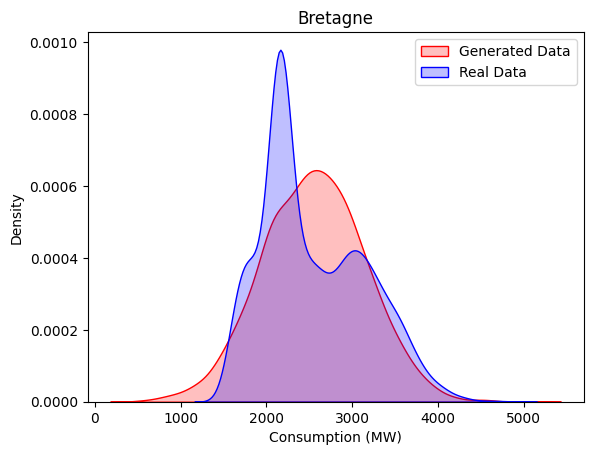

In [16]:
region = "Bretagne"
df_region = df[df.region == region]
sns.kdeplot(data=new_data, label="Generated Data", color='red', fill=True)
sns.kdeplot(data=df_region, x="consumption", label="Real Data", color='blue', fill=True)

plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

In [17]:
def get_winter_data(region_data):
    filtered_df= pd.DataFrame()
    for i in range(2011,2023):
        start_date = pd.to_datetime('{}-12-22'.format(i))
        end_date = pd.to_datetime('{}-03-21'.format(i+1))
        filtered_df1 = region_data[(pd.to_datetime(region_data['date']) >= start_date) & (pd.to_datetime(region_data['date']) <= end_date)]
        filtered_df = pd.concat([filtered_df, filtered_df1], ignore_index=True)
    return filtered_df

In [18]:
def plot_kde_real_and_generated(region_data, mean, sdv): 
    n = len(region_data['consumption'])  
    new_data = np.random.normal(mean, sdv, n)
    sns.kdeplot(data=new_data, label="Generated Data", color='red', fill=True)
    sns.kdeplot(data=region_data, x="consumption", label="Real Data", color='blue', fill=True)
    plt.title(region)
    plt.xlabel("Consumption (MW)")
    plt.legend() 

Mean:  3214.1782077393077
Standard deviation:  409.4763740819989


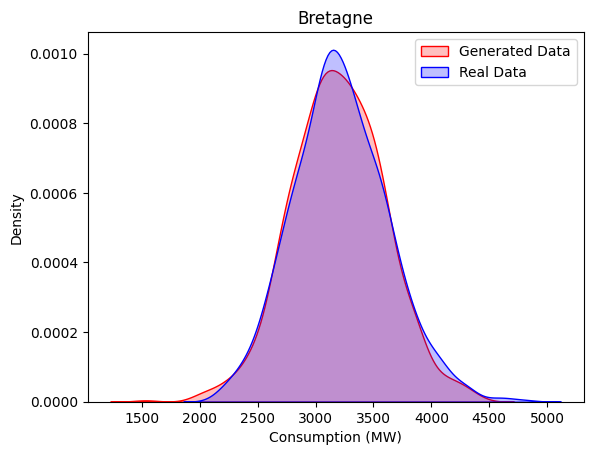

In [19]:
region = "Bretagne"
df_region = df[df.region == region]
filtered_df_winter = get_winter_data(df_region)
mean = calculate_mean(filtered_df_winter)
standard_deviation = calculate_sdv(filtered_df_winter, mean)
plot_kde_real_and_generated(filtered_df_winter,mean,standard_deviation)
print("Mean: ", mean)
print("Standard deviation: ", standard_deviation)

6. In which case the Gaussian model seems more appropriate?

The Gaussian model appears to be more suitable for the case presented in exercise 5. This can be infered from the similarity between the two plots: one representing the kernel density estimation (KDE) of real data and the other the KDE of generated data. In contrast, the plots obtained in exercise 4 exhibit significant differences between them, suggesting that the chosen model may not be the best fit for the data.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:

Let $A$ be a set that includes the supports of $f$ and $g$. 

$$
d(f, g) = \frac 1 2 \int\limits_{A} |f(x) - g(x)| \mathrm dx
$$

We can write that:

$$
d(f, g) = \frac 1 2 \int\limits_{A} |f(x) - g(x)| \mathrm dx \leqslant  \frac 1 2 \int\limits_{A} |f(x) + g(x)| \mathrm dx
$$

We can use the triangle inequality to write:

$$
d(f, g) \leqslant  \frac 1 2 \int\limits_{A} |f(x) + g(x)| \mathrm dx \leqslant \frac 1 2 \int\limits_{A} |f(x)| + |g(x)| \mathrm dx = \frac 1 2 \int\limits_{A} f(x) + \frac 1 2 \int\limits_{A} g(x) \mathrm dx = \frac{1}{2}1 + \frac{1}{2}1 = 1
$$

By the definiton of $|f(x)-g(x)| \geqslant 0$, therefore $d(f,g)\geqslant 0$. We can then conclude that $d(f,g) \in [0,1]$

---------------------------------------------------------------------------------

Now, we prove that $d(f,g)=0\Leftrightarrow f=g almost everywhere$

We consider 3 sets:

$$
A = \{ x \in \mathbb{R} \,| \, f(x) > g(x) \} \\
B = \{ x \in \mathbb{R} \,| \, f(x) < g(x) \} \\
C = \{ x \in \mathbb{R} \,| \, f(x) = g(x) \} \\
$$

Where $A \cap B \cap C = \emptyset$.

$d(f,g)=0$, then:

$$
d(f,g)=0=\frac{1}{2}\int\limits_{A \cup B \cup C} |f(x)-g(x)|dx=\frac{1}{2}\int\limits_{A}f(x)-g(x)dx + \frac{1}{2}\int\limits_{B}g(x)-f(x)dx + \frac{1}{2}\int\limits_{C}g(x)-f(x)dx
$$

As:

$$
\frac{1}{2}\int\limits_{C}g(x)-f(x)dx = 0
$$

We can write:

$$
0 = \frac{1}{2}\int\limits_{A}f(x)-g(x)dx + \frac{1}{2}\int\limits_{B}g(x)-f(x)dx 
$$

Both integrals are non-negative, but for their sum to be 0, it implies that the sets A and B must be empty. Therefore, we are left with 1 non-empty set $C = \{ x \in \mathbb{R} \,| \, f(x) = g(x) \}$.

Now, we consider that $f(x) = g(x)$ almost everywhere. Then:

$$
d(f,g)=\frac{1}{2}\int\limits_{D} |f(x)-g(x)|dx=\frac{1}{2}\int\limits_{A}f(x)-g(x)dx = 0
$$

Therefore $d(f,g)=0\Leftrightarrow f=g$ almost everywhere.

---------------------------------------------------------------------------------
Now we prove that $d(f,g)=1 \Leftrightarrow \, f$ and $g$ have disjoint supports.

First part

Let $A$ and $B$ be the supports of $f$ and $g$ respectively. As $d(f,g)=1$, we have:

$$
d(f,g)=1=\frac{1}{2}\int\limits_{A \cup B} |f(x)-g(x)|dx= \frac{1}{2}\int\limits_{A} |f(x)-g(x)|dx + \frac{1}{2}\int\limits_{B} |f(x)-g(x)|dx - \frac{1}{2}\int\limits_{A \cap B} |f(x)-g(x)|dx
$$

Let's consider the maximum values of each integral:

$$
\frac{1}{2}\int\limits_{A} |f(x)-g(x)|dx <= 0.5 \quad (I)\\
\frac{1}{2}\int\limits_{B} |f(x)-g(x)|dx <= 0.5 \quad (II)\\
\frac{1}{2}\int\limits_{A \cap B} |f(x)-g(x)|dx <= 0.5 \quad (III)\\
$$

d(f,g)=1, only if the integrals $I$ and $II$ are $0.5$ and $III$ is 0. For that, $g(x)$ needs to be $0$ in $A$ and $f(x)$ needs to be $0$ in $B$. Therefore, $A \cap B$ is an empty set and $f$ and $g$ have disjoint supports. 

Second part

Let $A$ and $B$ be the supports of $f$ and $g$ respectively. $A$ and $B$ are disjoint, which means that $f=0$ and $g=0$ almost everywhere outside $A$ and $B$ respectvely. We can write:

$$
d(f,g)=\frac{1}{2}\int\limits_{A \cap B} |f(x)-g(x)|dx= \frac{1}{2}\int\limits_{A} |f(x)-0|dx + \frac{1}{2}\int\limits_{B} |0-g(x)|dx = \frac{1}{2}\int\limits_{A} f(x)dx + \frac{1}{2}\int\limits_{B} g(x)dx = \frac{1}{2} 1 + \frac{1}{2} 1 = 1
$$

Therefore $d(f,g)=1 \Leftrightarrow$ $f$ and $g$ have disjoint supports.

2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [20]:
def calculate_dissimilarty(region_data):
    kde = gaussian_kde(region_data["consumption"])
    x_values = np.linspace(region_data["consumption"].min()-1000, region_data["consumption"].max()+1000, 1000) 
    # Calculate the values of the PDFs at these x values
    density_at_x = kde(x_values)  
    gaussian_density_at_x = norm.pdf(x_values, region_data["consumption"].mean(), region_data["consumption"].std())
    # Calculate the absolute difference between the two PDFs
    abs_diff = np.abs(gaussian_density_at_x - density_at_x)
    #calculate the integral
    dissimilarity = (1/2)*np.trapz(abs_diff, x_values)
    return dissimilarity

In [21]:
region = "Bretagne"
df_region = df[df.region == region]
dissimilarity = calculate_dissimilarty(df_region)
print("The dissimilarity is: {:.3f}".format(dissimilarity))

The dissimilarity is: 0.179


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [22]:
filtered_df = get_winter_data(df_region)
mean = calculate_mean(filtered_df)
sdv = calculate_sdv(filtered_df, mean)
dissimilarity = calculate_dissimilarty(filtered_df)
print("The dissimilarity is: {:.3f}".format(dissimilarity))

The dissimilarity is: 0.031


4. Do the same for all regions. Give the result as a single dataframe.

In [23]:
data =pd.DataFrame(columns=['region', 'region_dissimilarity', 'winter_dissimilarity'])
for region in regions:
    #whole region
    df_region = df[df.region == region]
    region_dissimilarity = calculate_dissimilarty(df_region)
    #winter
    filtered_df = get_winter_data(df_region)
    r_winter_dindissimilarity = calculate_dissimilarty(filtered_df)
    new_data = pd.DataFrame([{'region': region, 'region_dissimilarity': region_dissimilarity, 'winter_dissimilarity': r_winter_dindissimilarity}])
    data = pd.concat([data, new_data],  ignore_index=True)
data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18116\3977067330.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, new_data],  ignore_index=True)


,region,region_dissimilarity,winter_dissimilarity
0,Auvergne-Rhône-Alpes,0.165422,0.037355
1,Bourgogne-Franche-Comté,0.124547,0.037437
2,Bretagne,0.178947,0.030937
3,Centre-Val de Loire,0.193977,0.043147
4,Grand Est,0.114706,0.039030
5,Hauts-de-France,0.130644,0.027502
6,Normandie,0.174280,0.042745
7,Nouvelle-Aquitaine,0.215335,0.053731
8,Occitanie,0.220827,0.063235
9,Pays de la Loire,0.168759,0.039182


5. Which region is best fitted by a Gaussian model in winter?

In [24]:
index = data['winter_dissimilarity'].idxmin()
region_with_min_dissimilarity = data.iloc[[index]]
print("The region that best fits a Gaussian model in winter is the one with the smallest winter dissimilarity:")
region_with_min_dissimilarity[['region','winter_dissimilarity']]

The region that best fits a Gaussian model in winter is the one with the smallest winter dissimilarity:


,region,winter_dissimilarity
5,Hauts-de-France,0.027502


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

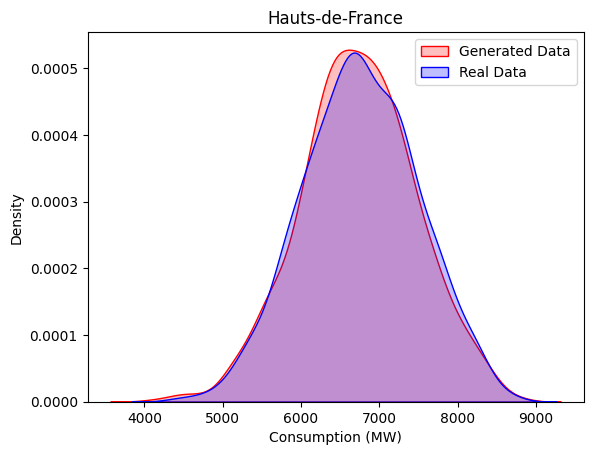

In [25]:
region = data.loc[index, 'region']
df_region = df[df.region == region]
filtered_df_winter = get_winter_data(df_region)
mean = calculate_mean(filtered_df_winter)
standard_deviation = calculate_sdv(filtered_df_winter, mean)
plot_kde_real_and_generated(filtered_df_winter,mean, standard_deviation)

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$ MW. We assume a Gaussian prior on $ \mu$ with mean $\mu_0=3500$ MW and standard deviation $\sigma_0=500$ MW. 

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

$\pi(u) \thicksim N(\mu_0, \sigma_0)$ and $ X \thicksim N(\mu, \sigma) $

The posterior distribution is:

$$ \pi(u|x) \propto  e^{-\frac{(u - \mu_0)^2}{2\sigma_0^2}} \prod_{i=1}^n  e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} = e^{-\frac{(u - \mu_0)^2}{2\sigma_0^2}} \cdot e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2} = e^{-\frac{(u - \mu_0)^2}{2\sigma_0^2} - \frac{1}{2\sigma^2} \sum_{i=1}^n (x_i - \mu)^2} $$

We can open the squares of a sum and take out the values that do not depend on $\mu$.

$$  \pi(u|x) \propto e^{-\frac{1}{2\sigma_0^2} (u^2 - 2uu_0 + \mu_0^2) - \frac{1}{2\sigma^2} \left(\sum_{i=1}^n x_i^2 - 2\mu\sum_{i=1}^n x_i + \sum_{i=1}^n \mu^2\right)} \propto  e^{-(\frac{1}{2\sigma_0^2} (u^2 - 2uu_0) - \frac{1}{2\sigma^2} \left(2\mu\sum_{i=1}^n x_i + n\mu^2\right))} = e^{-[u^2 (\frac{1}{2\sigma^2} + \frac{n}{2\sigma^2})-u(\frac{\mu_0}{\sigma_0^2}+\frac{\sum_{i=1}^nx_i}{\sigma^2})]} \quad (1)$$

We assume the posterior will also be a Gaussian distribution. So, we will have something similar to the following equation:

$$ \pi(u|x) \propto  e^{-\frac{(u - \mu_x)^2}{2\sigma_x^2}} = e^{-\frac{u^2-2uu_x+u_x^2}{2\sigma_x^2}} \propto e^{-\frac{u^2-2uu_x}{2\sigma_x^2}} \quad (2)$$

Comparing (1) and (2), we have:

$$ \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} = \frac{1}{\sigma_x^2} \rightarrow \sigma_x^2 = \frac{\sigma_0^2 \sigma^2}{\sigma^2+n\sigma_0^2} $$

$$ \frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2} = \frac{\mu_x}{\sigma_x^2} \rightarrow \sigma_x^2 \left[ \frac{\mu_0 \sigma^2 + \sigma_0^2 \sum_{i=1}^nx_i}{\sigma^2 \sigma^2} \right] \rightarrow \mu_x = \frac{\mu_0\sigma^2+\sigma_0^2\sum_{i=1}^n x_i}{\sigma^2+n\sigma_0^2} \$$

2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [26]:
def get_winter_year(data, year):
        data = data.copy()
        data['date'] = pd.to_datetime(data['date'])
        is_winter = (
        ((data['date'].dt.month == 12) & (data['date'].dt.day >= 22) & (data['date'].dt.year == year - 1)) |
        ((data['date'].dt.month <= 2) & (data['date'].dt.year == year)) |
        ((data['date'].dt.month == 3) & (data['date'].dt.day <= 21) & (data['date'].dt.year == year)))
        return data[is_winter]

In [27]:
sdv = 400
u_0 = 3500
sdv_0 = 500
region = "Bretagne"
df_region = df[df.region == region]
filtered_data = get_winter_data(df_region)

In [28]:
#mean and variance of the posterior distribution
data = pd.DataFrame(columns=['year','posterior_mean','posterior_variance'])
for year in range(2013,2024):
    data_winter_year = get_winter_year(filtered_data, year)
    n = len(data_winter_year['consumption'])
    sum_xi = data_winter_year['consumption'].sum()
    sdv_p = np.sqrt(((sdv_0**2)*(sdv**2))/((sdv**2)+n*(sdv_0**2)))
    u_p = ((u_0 * sdv ** 2) + (sdv_0 ** 2) * sum_xi) / (sdv ** 2 + n * sdv_0 ** 2)
    new_data = pd.DataFrame([{'year':year,'posterior_mean':u_p,'posterior_variance':sdv_p**2}])
    data = pd.concat([data,new_data], ignore_index=True)
data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18116\854537438.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,new_data], ignore_index=True)


,year,posterior_mean,posterior_variance
0,2013,3395.176091,1984.126984
1,2014,3095.134598,1765.225066
2,2015,3229.578553,1765.225066
3,2016,3133.762549,1745.962462
4,2017,3275.816417,1765.225066
5,2018,3328.695940,1765.225066
6,2019,3179.931598,1765.225066
7,2020,3124.061545,1745.962462
8,2021,3360.657546,1765.225066
9,2022,3216.041483,1765.225066


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18116\3016652561.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_kde_real_and_generated(data_winter_2023, data.iloc[10,:][1], np.sqrt(data.iloc[10,:][2]))


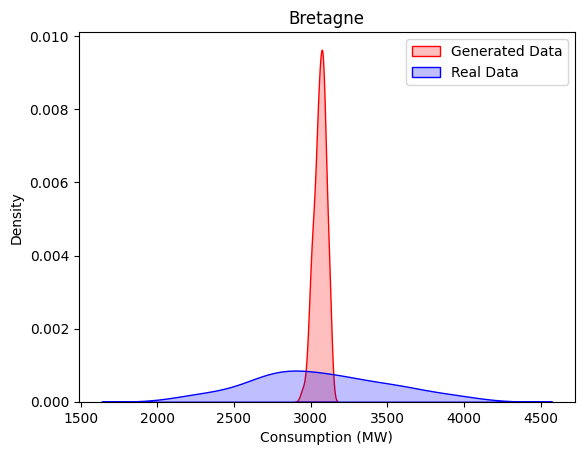

In [29]:
data_winter_2023 = get_winter_year(filtered_data, 2023)
plot_kde_real_and_generated(data_winter_2023, data.iloc[10,:][1], np.sqrt(data.iloc[10,:][2]))

4. Discuss the results, comparing to those obtained in part A.

In [30]:
#Results obtained in part A
mean_part_A = data_winter_2023['consumption'].mean()

#Results obtained in part B
mean_part_B = data.iloc[10,:][1]

print("Mean obtained - part A: ", mean_part_A)
print("Mean obtained - part C: ", mean_part_B)

Mean obtained - part A:  3058.0333333333333
Mean obtained - part C:  3061.1540158870257


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18116\3692577260.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_part_B = data.iloc[10,:][1]


Your answer: 

The Bayesian estimate (Part C) incorporates prior information, offering a more robust estimate of the population mean (3061.15). In contrast, the method of moments (Part A) provides a sample mean of 3058.03. The slight difference reflects the impact of prior knowledge in Bayesian estimation.

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer: 

The statistical test at level $\alpha$ is:

Null hypothesis: $H_0 = \{\sigma_0^2 = 400^2 \}$.

Alternative hypothesis: $H_1 = \{\sigma_1^2 = 500^2\}$.

The likelihood functions are:

$$
p_0(x) = \prod_{i=1}^n \frac{1}{\sigma_0\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma_0^2}\right) = \left(\frac{1}{\sigma_0\sqrt{2\pi}}\right)^n \exp\left(-\frac{1}{2\sigma_0^2}\sum_{i=1}^n (x_i - \mu)^2\right)
$$

$$
p_1(x) = \prod_{i=1}^n \frac{1}{\sigma_1\sqrt{2\pi}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma_1^2}\right) = \left(\frac{1}{\sigma_1\sqrt{2\pi}}\right)^n \exp\left(-\frac{1}{2\sigma_1^2}\sum_{i=1}^n (x_i - \mu)^2\right)
$$

The likelihood ratio is:

$$
\frac{p_1(x)}{p_0(x)} = \frac{\left(\frac{1}{\sigma_1\sqrt{2\pi}}\right)^n \exp\left(-\frac{1}{2\sigma_1^2}\sum_{i=1}^n (x_i - \mu)^2\right)}{\left(\frac{1}{\sigma_0\sqrt{2\pi}}\right)^n \exp\left(-\frac{1}{2\sigma_0^2}\sum_{i=1}^n (x_i - \mu)^2\right)}
$$

$$
\frac{p_1(x)}{p_0(x)} = \frac{\left(\frac{1}{\sigma_1\sqrt{2\pi}}\right)^n}{\left(\frac{1}{\sigma_0\sqrt{2\pi}}\right)^n} \exp\left(\frac{1}{2}\left(\frac{1}{\sigma_0^2} - \frac{1}{\sigma_1^2}\right)\sum_{i=1}^n (x_i - \mu)^2\right)
$$

As we can see, the likelihood ratio is monotonic and increases as $\sum_{i=1}^n(x_i-\mu)^2$ increases. Therefore, we can create the following test:

$$
\alpha=P(\sum_{i=1}^n(x_i-\mu)^2 > c) = P(\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma_0^2} > \frac{c}{\sigma_0^2})
$$

Therefore we reject $H_0$ if $\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma_0^2} > \frac{c}{\sigma_0^2} = Q(1-\alpha)$, where $c=\sigma_0^2 Q(1-\alpha)$, Q(.) is the quantile function of $\chi^2$ and $\sum_{i=1}^n\frac{(x_i-\mu)^2}{\sigma_0^2} \sim \chi^2$.

2. Provide the result of this test for $\alpha=1\%$.

In [52]:
region = "Bretagne"
df_region = df[df.region == region]
df_region_winter = get_winter_data(df_region)
df_region_winter_2023 = get_winter_year(df_region, 2023)
n = len(df_region_winter_2023)
variance_0 = 400**2
mean = 3200

test_statistics = 0
for i in df_region_winter_2023['consumption']:
    test_statistics += ((i-mean)**2)/variance_0

alpha = 0.01
degrees_of_freedom = n  
p = 1-alpha 

if (test_statistics > chi2.ppf(p, degrees_of_freedom)):
    print("Result: H0 is rejected!")
else:
    print("Result: We fail to reject H0")

Result: We fail to reject H0


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter. 

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

In [32]:
region1 = "Bretagne"
region2 = "Provence-Alpes-Côte d'Azur"
df_region_bretagne_winter = get_winter_data(df[df.region == region1])
df_region_provence_winter = get_winter_data(df[df.region == region2])
data = {'Bretagne':df_region_bretagne_winter['consumption'], "Provence-Alpes-Côte d'Azur": df_region_provence_winter['consumption']}

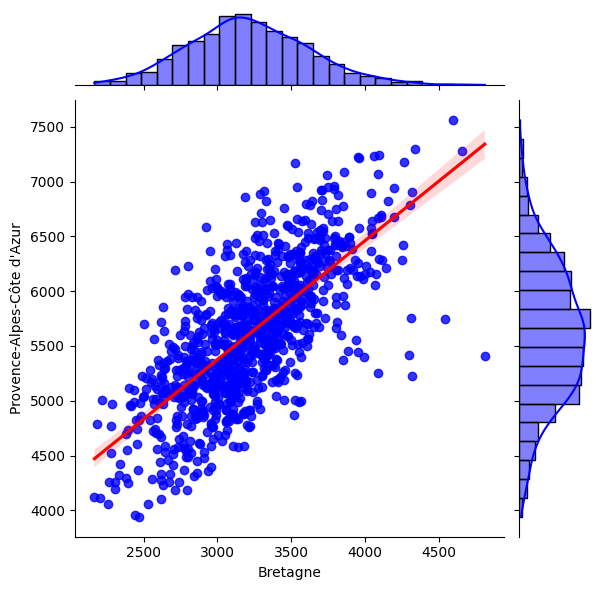

In [33]:
data_joint = pd.DataFrame(data)
sns.jointplot(x='Bretagne', y="Provence-Alpes-Côte d'Azur", data=data_joint, kind="reg", color='blue',joint_kws={'line_kws':{'color':'red'}})

2. Do you think the power consumption in these two regions is independent?

Your answer:

I think the power consumption in these two regions are not independent as there is a clear linear relationship between the power consumption in both regions

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$. 

Your answer:

We have n i.i.d. oberservations $(X_1,Y_1),...,(X_n,Y_n)$. 

Let $X_1, X_2,...,X_n$ be the samples for the region Bretagne in winter and $Y_1, Y_2,...,Y_n$ for the region Provence-Alpes-Côte d'Azur in winter.

The Null and the alternative hypothesis are:

Null hypothesis: $H_0 = {X \perp Y }$.

Alternative hypothesis: $H_1 = {X \not\perp Y }$.

We choose partitions $A_1, A_2,...,A_k$ and $B_1, B_2,...,B_k$ of the corresponding value spaces. Let

$N_{ij}= \sum_{t=1}^n \mathbb{1}_{\{X_t \in A_i, Y_t \in B_j\}} \quad N_{i}=\sum_{t=1}^n \mathbb{1}_{\{X_t \in A_i\}} \quad N_j=\sum_{t=1}^n \mathbb{1}_{\{Y_t \in B_j\}}$

The $\chi^2$ statistic for independence is:

$$
T(X,Y) = \sum_{i,j}^n \frac{\left(N_{ij}-\frac{N_iN_j}{n}\right)^2}{\frac{N_iN_j}{n}} \rightarrow \chi^2((K-1)(L-1)) \text{ when } n \rightarrow +\infty
$$

The Null hypothesis will be rejected when $T(x,y)>c$. For a test at level $\alpha$, we have (under the null hypotheis):

$$
\alpha=P_0(T(X,Y)>c)
$$

In this case, as $n$ is large, we take $c=Q(1-\alpha)$ where $Q$ is the quantile function of the $\chi^2((K-1)(L-1))$ distribution.

4. Give the result of this test for $\alpha=1\%$. 

In [34]:
data_joint

interval_size = 200

# Define the custom intervals for both columns
bretagne_intervals = np.arange(data_joint['Bretagne'].min(), data_joint['Bretagne'].max() + interval_size,interval_size)

# Create intervals for 'Provence-Alpes-Côte d'Azur' starting from the minimum value, incrementing by 'n', and ending at the maximum value
provence_intervals = np.arange(data_joint['Provence-Alpes-Côte d\'Azur'].min(), data_joint['Provence-Alpes-Côte d\'Azur'].max() + interval_size, interval_size)


# Use pd.cut to categorize the values into custom intervals
data_joint['Bretagne_intervals'] = pd.cut(data_joint['Bretagne'], bins=bretagne_intervals)
data_joint['Provence_intervals'] = pd.cut(data_joint['Provence-Alpes-Côte d\'Azur'], bins=provence_intervals)

# Create a contingency table using pd.crosstab
contingency_table = pd.crosstab(data_joint['Bretagne_intervals'], data_joint['Provence_intervals'])
contingency_table

Provence_intervals,"(3940, 4140]","(4140, 4340]","(4340, 4540]","(4540, 4740]","(4740, 4940]","(4940, 5140]","(5140, 5340]","(5340, 5540]","(5540, 5740]","(5740, 5940]","(5940, 6140]","(6140, 6340]","(6340, 6540]","(6540, 6740]","(6740, 6940]","(6940, 7140]","(7140, 7340]","(7540, 7740]"
Bretagne_intervals,,,,,,,,,,,,,,,,,,
"(2167, 2367]",2,4,2,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0
"(2367, 2567]",2,3,1,6,4,10,5,0,1,0,0,0,0,0,0,0,0,0
"(2567, 2767]",1,7,5,9,7,24,14,9,4,1,0,1,0,0,0,0,0,0
"(2767, 2967]",0,3,10,9,17,17,25,24,13,9,7,1,1,1,0,0,0,0
"(2967, 3167]",0,0,0,6,18,32,38,32,30,16,20,4,3,0,0,0,0,0
"(3167, 3367]",0,0,0,1,10,8,16,29,41,27,28,16,7,4,4,0,0,0
"(3367, 3567]",0,0,0,0,1,5,12,12,24,28,24,22,13,4,1,1,1,0
"(3567, 3767]",0,0,0,0,0,0,0,3,9,10,13,21,17,8,7,2,0,0
"(3767, 3967]",0,0,0,0,0,0,0,3,4,2,6,9,15,3,4,2,2,0


In [35]:
Ni = contingency_table.sum(axis=1).to_list()
Nj = contingency_table.sum(axis=0).to_list()

In [36]:
# Calculate degrees of freedom
K, L = contingency_table.shape

T_X_Y = 0
n = len(data_joint["Bretagne"])

for i in range(0,K):
    for j in range(0,L):
        T_X_Y = T_X_Y + ((contingency_table.iloc[i,j]-(Ni[i]*Nj[j])/n)**2)/((Ni[i]*Nj[j])/n)

In [37]:
# For alpha = 1% we have
degrees_of_freedom = (K - 1) * (L - 1)
alpha = 0.01
p = 1-alpha
c = chi2.ppf(p, degrees_of_freedom)

if T_X_Y > c:
    print("We reject H0 - The power consumption in these two regions is not independent")
else:
    print("We fail to reject H0")

We reject H0 - The power consumption in these two regions is not independent


## F. Confidence intervals

Consider the region Bretagne in winter. 

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption. 

The confidence region $\delta(x)$ at level $\alpha=95%$ is given by:

$$
\delta(x) = \left[ \bar{X} - \frac{c\sigma}{\sqrt{n}}, \bar{X} + \frac{c\sigma}{\sqrt{n}} \right]
$$

Where $\bar{X}$ is:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n x_i
$$

$c$ is equal to the quantile function $Q$ of the normal distribution, that is $c=Q(1-(1-\alpha)/2)$.

As mentioned on exercise c, the standard deviation of the region Bretagne in winter is equal to 400MW. The computation of the confidence interval is below:

In [38]:
region1 = "Bretagne"
df_region_bretagne_winter = get_winter_data(df[df.region == region1])
mean = df_region_bretagne_winter["consumption"].mean()
sdv = 400
n = len(df_region_bretagne_winter["consumption"])

alpha = 0.95
p = (1-alpha)/2
c = norm.ppf(1-p)

# upper limit of confidence interval

upper_limit = mean + c*sdv/np.sqrt(n)

# lower limit of confidence interval

lower_limit = mean - c*sdv/np.sqrt(n)

print("The confidence interval is δ(x) = [{}, {}]".format(lower_limit, upper_limit))

The confidence interval is δ(x) = [3189.1602221252256, 3239.19619335339]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

We have:

Null hypothesis: $H_0 = \{\mu = 3100 \}$.

Alternative hypothesis: $H_1 = \{\mu \neq 3100 \}$

The Student test at level $\alpha = 5\% $ is:

$$
\alpha = P_0\left(|\bar{X}| > c\right) = 2P\left(\bar{X} > c\right) = 2P\left(\frac{\bar{X} - \mu_0}{S/\sqrt{n}} > t_{n-1, \alpha/2}\right)
$$

Where $t_{n-1, \alpha/2}$ is the point beyond which the $t$ distribution with $n − 1$ degrees of freedom has probability $\alpha/2$. $S$ and $\bar X$ are:

$$
\bar X = \frac 1 n \sum_{i=1}^n x_i\quad S = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$

Below are the results of the test:

In [39]:
from scipy.stats import t

In [40]:
df_region_bretagne_winter
df_region_winter_2023 = df_region_bretagne_winter[pd.to_datetime(filtered_data['date']).dt.year == 2023]
df_region_winter_2023

,region,date,consumption
902,Bretagne,2023-01-01,2306
903,Bretagne,2023-01-02,2702
904,Bretagne,2023-01-03,3049
905,Bretagne,2023-01-04,2904
906,Bretagne,2023-01-05,2833
...,...,...,...
977,Bretagne,2023-03-17,2609
978,Bretagne,2023-03-18,2309
979,Bretagne,2023-03-19,2206
980,Bretagne,2023-03-20,2672


In [41]:
# two-tailed test for alpha = 5%
alpha = 0.05
n = len(df_region_winter_2023["consumption"])
mean = df_region_winter_2023["consumption"].mean()
s = calculate_sdv(df_region_winter_2023, mean)
u_0 = 3100

test_statistics = (np.sqrt(n)*(mean-u_0))/s

degrees_of_freedom = n-1  
p = 1-alpha/2 

t.ppf(p, degrees_of_freedom)

if (test_statistics > t.ppf(p, degrees_of_freedom)) or (test_statistics < -t.ppf(p, degrees_of_freedom)):
    print("We reject the null hypothesis H0")
else:
    print("We fail to reject the null hypothesis H0")

We fail to reject the null hypothesis H0
